In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import (
    OneHotEncoder,
    StandardScaler
)
import pandas as pd
import numpy as np
## separando en train, test 
from sklearn.model_selection import train_test_split
## Configuración del RF
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import time
from sklearn.preprocessing import StandardScaler, OneHotEncoder, KBinsDiscretizer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import random

- La tabla de métricas de tu mejor modelo
- La curva ROC
- La curva de precision y recall
- Las tablas de métricas obtenidas de la clase Group de Aequitas (conteos de frecuencias y absolutas)
- La visualización de tus 3 métricas seleccionadas con la salida de Group
- Las tablas de métricas obtenidas de la clase Bias de Aequitas (conteos de frecuencias y absolutas)
- La visualización de tus 3 métricas seleccionadas con la salida de Bias (disparidad)
- Las tablas de métricas obtenidas de la clase Fairness de Aequitas (conteos de frecuencias y absolutas)
- La visualización de tus 3 métricas seleccionadas con la salida de Fairness (equidad)

In [2]:
import pickle

In [3]:
#feature_importance = pickle.load(
#    open('/Users/ele/Documents/EquiposGit/Intro/Intropruebapipe/IntroCD_proy1/outputs/fe_df_imp_features.pkl','rb'))

In [4]:
#feature_importance.sort_values(by="importance", ascending=False)

In [5]:
#feature_importances_

In [6]:
# ytest
y_test = pickle.load(
    open('/Users/ele/Documents/EquiposGit/Intro/Intropruebapipe/IntroCD_proy1/outputs/y_test.pkl','rb'))

In [7]:
y_test.shape

(414942,)

In [8]:
random.seed(1)

In [9]:
# predicciones con el mejor predictor 
#predicted_scores = pickle.load(
#    open('/Users/ele/Documents/EquiposGit/Intro/Intropruebapipe/IntroCD_proy1/outputs/test_predict_scores.pkl','rb'))

In [10]:
#predicted_scores

In [11]:
p = np.random.beta(20000, 10000,414942)
p

array([0.666987  , 0.66584987, 0.67321434, ..., 0.67041197, 0.67306555,
       0.66470696])

In [12]:
predicted_scores=np.vstack((p,1-p)).T
#predicted_scores.reshape(414942,2)
predicted_scores

array([[0.666987  , 0.333013  ],
       [0.66584987, 0.33415013],
       [0.67321434, 0.32678566],
       ...,
       [0.67041197, 0.32958803],
       [0.67306555, 0.32693445],
       [0.66470696, 0.33529304]])

In [13]:
predicted_labels = np.random.binomial(1,predicted_scores[:,1])

In [14]:
# predicciones de las etiquetas con los mejores parámetros encontrados
#predicted_labels = pickle.load(
#    open('/Users/ele/Documents/EquiposGit/Intro/Intropruebapipe/IntroCD_proy1/outputs/test_predict_labs.pkl','rb'))

In [15]:
sum(predicted_labels)

138102

In [16]:
predicted_labels.shape

(414942,)

In [17]:
predicted_scores.shape

(414942, 2)

In [18]:
#predicted_scores[:,1]

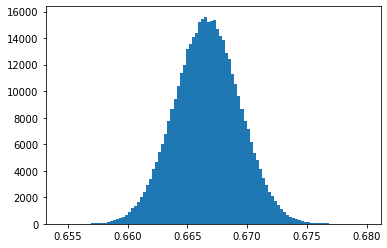

In [19]:
#plt.hist(predicted_scores[:,0],bins=100)
plt.hist(predicted_scores[:,0],bins=100)
plt.show()

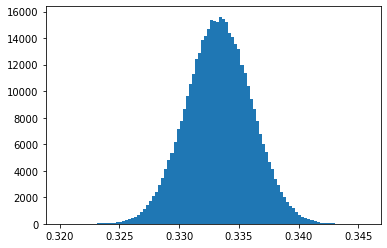

In [20]:
plt.hist(predicted_scores[:,1],bins=100)
plt.show()

## Métricas de desempeño

### ROC y AUC

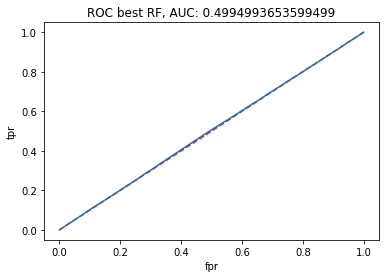

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

import matplotlib.pyplot as plt

%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, predicted_scores[:,1], pos_label=1)

plt.clf()
plt.plot([0,1],[0,1], 'k--', c="red")
plt.plot(fpr, tpr)
plt.title("ROC best RF, AUC: {}".format(roc_auc_score(y_test, predicted_labels)))
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.show()

### Matriz de confusión

In [22]:
from sklearn.metrics import confusion_matrix
from tabulate import tabulate
confu0=confusion_matrix(y_test, predicted_labels, normalize='all')
confu1=confusion_matrix(y_test, predicted_labels)

In [23]:
print(tabulate(np.array([['True Positive (tp)', 'False Negative (fn)'],
                    ['False Positive (fp)', 'True Negative (tn)']]),
               headers=['Dato\Predicción','Etiqueta +','Etiqueta -'],
               showindex=['Etiqueta +','Etiqueta -'],
               tablefmt='pretty'))

+-----------------+---------------------+---------------------+
| Dato\Predicción |     Etiqueta +      |     Etiqueta -      |
+-----------------+---------------------+---------------------+
|   Etiqueta +    | True Positive (tp)  | False Negative (fn) |
|   Etiqueta -    | False Positive (fp) | True Negative (tn)  |
+-----------------+---------------------+---------------------+


In [24]:
print(tabulate(confu1,
               headers=['Dato\Predicción','Etiqueta +','Etiqueta -'],
               showindex=['Etiqueta +','Etiqueta -'],
               tablefmt='pretty'))

+-----------------+------------+------------+
| Dato\Predicción | Etiqueta + | Etiqueta - |
+-----------------+------------+------------+
|   Etiqueta +    |   220527   |   110111   |
|   Etiqueta -    |   56313    |   27991    |
+-----------------+------------+------------+


In [25]:
print(tabulate(confu0,
               headers=['Dato\Predicción','Etiqueta +','Etiqueta -'],
               showindex=['Etiqueta +','Etiqueta -'],
               tablefmt='pretty'))

+-----------------+--------------------+---------------------+
| Dato\Predicción |     Etiqueta +     |     Etiqueta -      |
+-----------------+--------------------+---------------------+
|   Etiqueta +    | 0.5314646384313952 | 0.2653647979717647  |
|   Etiqueta -    | 0.1357129430137224 | 0.06745762058311765 |
+-----------------+--------------------+---------------------+


#### Accuracy

$$accuracy=\frac{\text{tp+tn}}{\text{tp+fp+tn+fn}}= \frac{\text{predichos correctamente}}{\text{total}}$$

#### Precision


$$precision=\frac{\text{tp}}{\text{tp+fp}}= \frac{\text{predichos positivos correctos}}{\text{predichos positivos}}$$

De los que identificamos como clase positiva, cuántos identificamos correctamente -pureza en nuestra predicción-. 

### Recall

$$recall=\frac{\text{tp}}{\text{tp+fn}}= \frac{\text{predichos positivos correctos}}{\text{datos positivos}}$$

Del universo posible de nuestra clase positiva, cúantos identificamos correctamente

#### F1-score

Combina precision y recall para obtimizar ambos.

$$F=2\cdot  \left( \frac{\text{precision}\cdot \text{recall}}{\text{precision + recall}} \right)$$

In [26]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve

In [27]:
#### Accuracy
accuracy_score(y_test, predicted_labels)

0.5989222590145129

In [28]:
#### Precision, recall, thresholds
precision, recall, thresholds_2 = precision_recall_curve(y_test, predicted_scores[:,1], pos_label=1)

In [29]:
thresholds_2 = np.append(thresholds_2, 1)

In [30]:
(precision.shape, recall.shape, thresholds_2.shape)

((414940,), (414940,), (414940,))

In [31]:
# F1_score junto con las otras medidas
def get_metrics_report(fpr, tpr, thresholds, precision, recall, thresholds_2):
    df_1 = pd.DataFrame({'threshold': thresholds_2,'precision': precision,
                    'recall': recall})
    df_1['f1_score'] = 2 * (df_1.precision * df_1.recall) / (df_1.precision + df_1.recall)
    
    df_2 = pd.DataFrame({'tpr': tpr, 'fpr': fpr, 'threshold': thresholds})
    df_2['tnr'] = 1 - df_2['fpr']
    df_2['fnr'] = 1 - df_2['tpr']
    
    df = df_1.merge(df_2, on="threshold")
    
    return df

In [32]:
metrics_report = get_metrics_report(fpr, tpr, thresholds, precision, recall, thresholds_2)
metrics_report

,threshold,precision,recall,f1_score,tpr,fpr,tnr,fnr
0,0.321507,0.203172,1.000000,0.337727,1.000000,0.999991,0.000009,0.000000
1,0.321996,0.203170,0.999988,0.337724,0.999988,0.999991,0.000009,0.000012
2,0.322377,0.203172,0.999988,0.337727,0.999988,0.999979,0.000021,0.000012
3,0.322392,0.203170,0.999976,0.337723,0.999976,0.999979,0.000021,0.000024
4,0.322530,0.203172,0.999976,0.337726,0.999976,0.999967,0.000033,0.000024
...,...,...,...,...,...,...,...,...
134642,0.344566,0.375000,0.000036,0.000071,0.000036,0.000015,0.999985,0.999964
134643,0.344675,0.285714,0.000024,0.000047,0.000024,0.000015,0.999985,0.999976
134644,0.344940,0.333333,0.000024,0.000047,0.000024,0.000012,0.999988,0.999976
134645,0.345062,0.200000,0.000012,0.000024,0.000012,0.000012,0.999988,0.999988


In [33]:
negocio = metrics_report[metrics_report.fpr <= 0.07]
negocio

,threshold,precision,recall,f1_score,tpr,fpr,tnr,fnr
125176,0.337352,0.204414,0.070530,0.104875,0.070530,0.069992,0.930008,0.929470
125177,0.337352,0.204387,0.070519,0.104858,0.070519,0.069992,0.930008,0.929481
125178,0.337352,0.204422,0.070519,0.104863,0.070519,0.069977,0.930023,0.929481
125179,0.337352,0.204395,0.070507,0.104846,0.070507,0.069977,0.930023,0.929493
125180,0.337353,0.204479,0.070507,0.104857,0.070507,0.069941,0.930059,0.929493
...,...,...,...,...,...,...,...,...
134642,0.344566,0.375000,0.000036,0.000071,0.000036,0.000015,0.999985,0.999964
134643,0.344675,0.285714,0.000024,0.000047,0.000024,0.000015,0.999985,0.999976
134644,0.344940,0.333333,0.000024,0.000047,0.000024,0.000012,0.999988,0.999976
134645,0.345062,0.200000,0.000012,0.000024,0.000012,0.000012,0.999988,0.999988


In [34]:
punto_corte = negocio.head(1).threshold.values[0]
punto_corte

0.3373516050671075

In [35]:
new_labels = [0 if score < punto_corte else 1 for score in predicted_scores[:,1]]

In [36]:
new_labels[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [37]:
pd.Series(new_labels).sum()

29088

In [38]:
confusion_matrix(y_test, new_labels)

array([[307496,  23142],
       [ 78358,   5946]])

In [39]:
confusion_matrix(y_test, predicted_labels)

array([[220527, 110111],
       [ 56313,  27991]])

In [40]:
from sklearn.metrics import precision_score, recall_score

In [41]:
def precision_at_k(y_true, y_scores, k):
    threshold = np.sort(y_scores)[::-1][int(k*len(y_scores))]
    y_pred = np.asarray([1 if i >= threshold else 0 for i in y_scores])

    return precision_score(y_true, y_pred)

In [42]:
def recall_at_k(y_true, y_scores, k):
    threshold = np.sort(y_scores)[::-1][int(k*len(y_scores))]
    y_pred = np.asarray([1 if i >= threshold else 0 for i in y_scores])

    return recall_score(y_true, y_pred)

In [139]:
#def get_top_k(y_true, y_scores, k):
#    values = np.c_[y_scores,y_true][np.c_[y_scores,y_true][:,0].argsort()[::-1]]
#    return values[0:int(k*len(values))]

In [140]:
#def pr_k_curve(y_true, y_scores):
#    k_values = list(np.arange(0.1, 1.1, 0.1))
#    pr_k = pd.DataFrame()
#    d=pd.DataFrame()
#    
#    for k in k_values:
#        d['k'] = k
#        ## get_top_k es una función que ordena los scores de
#        ## mayor a menor y toma los k% primeros
#        top_k = get_top_k(y_true, y_scores, k)
#        d['precision'] = precision_at_k(y_true, y_scores, k)
#        d['recall'] = recall_at_k(y_true, y_scores, k)
#        
#        
#
#        pr_k = pr_k.append(d)
#
#    # para la gráfica
#    fig, ax1 = plt.subplots()
#    ax1.plot(pr_k['k'], pr_k['precision'], label='precision')
#    ax1.plot(pr_k['k'], pr_k['recall'], label='recall')
#    plt.legend()
#
# #   if save_target is not None:
#    #    plt.savefig(save_target, dpi=300)
#
#    return pr_k

In [141]:
#get_top_k(predicted_labels,y_test,0.2)

In [142]:
#predicted_labels

In [143]:
precision_at_k(predicted_labels,y_test,0.2)

0.33202457771873223

In [144]:
recall_at_k(predicted_labels,y_test,0.2)

0.20268352377228424

In [175]:
k_values = list(np.arange(0.1, 0.99, 0.01))

In [176]:
len(k_values)

89

In [177]:
d = pd.DataFrame(index=range(len(k_values)),columns=['k','precision','recall'])

In [178]:
#d

In [179]:
for k in range(len(k_values)):
    d['k'][k] = k_values[k]
    d['precision'][k]=precision_at_k(predicted_labels,y_test,k_values[k])
    d['recall'][k]=recall_at_k(predicted_labels,y_test,k_values[k])

In [167]:
d

,k,precision,recall
0,0.1,0.332025,0.202684
1,0.15,0.332025,0.202684
2,0.2,0.332025,0.202684
3,0.25,0.332822,1
4,0.3,0.332822,1
5,0.35,0.332822,1
6,0.4,0.332822,1
7,0.45,0.332822,1
8,0.5,0.332822,1
9,0.55,0.332822,1


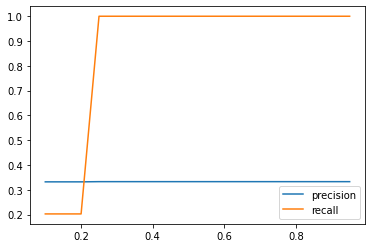

In [169]:
fig, ax1 = plt.subplots()
ax1.plot(d['k'], d['precision'], label='precision')
ax1.plot(d['k'], d['recall'], label='recall')
plt.legend()